# Task 1: Object Classification

This task uses the object detection models VGG16, VGG19 and ResNet50. As for the dataset it uses the test dataset in task 2.




1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 127ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 77ms/step
VGG16 Accuracy: 55.08%
VGG19 Accuracy: 53.95%
ResNet50 Accuracy: 49.44%


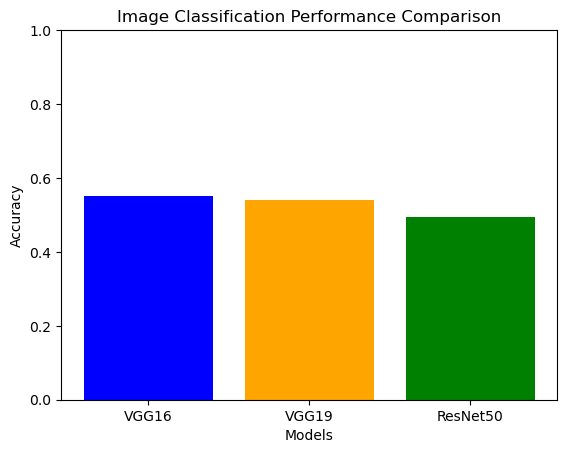

In [1]:
#Import Libraries
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input as preprocess_input_vgg19
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_input_resnet50

# Function to get the top prediction for an image using a given model
def PredictedLabel(model, img_path, preprocess_function):
    target_size = (224, 224)  
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_function(img_array)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)

    # Get the label with the highest confidence
    top_prediction = decoded_predictions[0][0][1]
    
    return top_prediction

# Gets the accuracy depending on the number of correct predictions
def custom_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_pred)

    for pred_label in y_pred:
        pred_label = pred_label.lower()

        if y_true in pred_label:
            correct += 1

    accuracy = correct / total
    return accuracy

# Directory containing your images
path = r'C:\Users\Nicholas Vella\Documents\GitHub\ARI3129-Group-Project\Task 2\train'
images = [f for f in os.listdir(path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Full paths to the images
image_paths = [os.path.join(path, img_file) for img_file in images]

# Load pre-trained models
modelVGG16 = VGG16(weights='imagenet')
modelVGG19 = VGG19(weights='imagenet')
modelResnet50 = ResNet50(weights='imagenet')

true_label = "pizza"
predVGG16 = []
predVGG19 = []
predResnet50 = []

# Iterate over image paths and set the true label to "pizza" for all images
for img_path in image_paths:

    # Get top predictions 
    predVGG16.append(PredictedLabel(modelVGG16, img_path, preprocess_input_vgg16))
    predVGG19.append(PredictedLabel(modelVGG19, img_path, preprocess_input_vgg19))
    predResnet50.append(PredictedLabel(modelResnet50, img_path, preprocess_input_resnet50))


# Calculate accuracy scores for each model using the custom accuracy function
accuracyVGG16 = custom_accuracy(true_label, predVGG16)
accuracyVGG19 = custom_accuracy(true_label, predVGG19)
accuracyResnet50 = custom_accuracy(true_label, predResnet50)

# Output accuracy scores
print(f"VGG16 Accuracy: {accuracyVGG16:.2%}")
print(f"VGG19 Accuracy: {accuracyVGG19:.2%}")
print(f"ResNet50 Accuracy: {accuracyResnet50:.2%}")

# Plot a bar chart for performance comparison
models = ['VGG16', 'VGG19', 'ResNet50']
accuracies = [accuracyVGG16, accuracyVGG19, accuracyResnet50]

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Image Classification Performance Comparison')
plt.ylim(0, 1)  
plt.show()
